<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature Extraction</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis-(PCA)" data-toc-modified-id="Principal-Component-Analysis-(PCA)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Principal Component Analysis (PCA)</a></span></li><li><span><a href="#t-Distributed-Stochastic-Neighbor-Embedding-(t-SNE)" data-toc-modified-id="t-Distributed-Stochastic-Neighbor-Embedding-(t-SNE)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>t-Distributed Stochastic Neighbor Embedding (t-SNE)</a></span></li><li><span><a href="#Linear-Discriminant-Analysis-(LDA)" data-toc-modified-id="Linear-Discriminant-Analysis-(LDA)-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Linear Discriminant Analysis (LDA)</a></span></li><li><span><a href="#Indipendent-Component-Analysis-(ICA)" data-toc-modified-id="Indipendent-Component-Analysis-(ICA)-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Indipendent Component Analysis (ICA)</a></span></li><li><span><a href="#Locally-Linear-Embedding-(LLE)" data-toc-modified-id="Locally-Linear-Embedding-(LLE)-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Locally Linear Embedding (LLE)</a></span></li><li><span><a href="#Autoencoders" data-toc-modified-id="Autoencoders-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Autoencoders</a></span></li></ul></li></ul></li></ul></div>

# Feature Extraction

In this notebook, I will make use of the Mushroom Classification dataset to try to predict if a Mushroom is poisonous or not by looking at the given features. I will successivelly try differerent feature extraction techniques to see how this can affect training times and overall model accuracy.

Reducing the number of features in a dataset, can lead to:

- Accuracy improvements
- Overfitting risk reduction
- Speed up in training
- Improved Data Visualization

## Preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import time
import os

In [2]:
df = pd.read_csv('mushrooms.csv')
pd.options.display.max_columns = None
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
class,0.0
stalk-surface-above-ring,0.0
population,0.0
spore-print-color,0.0
ring-type,0.0
ring-number,0.0
veil-color,0.0
veil-type,0.0
stalk-color-below-ring,0.0
stalk-color-above-ring,0.0


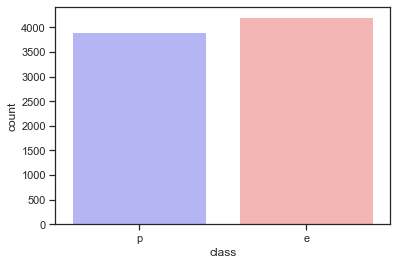

In [4]:
sns.set(style="ticks")
f = sns.countplot(x="class", data=df, palette="bwr")
plt.show()

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [7]:
X = pd.get_dummies(X, prefix_sep='_')
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [8]:
len(X.columns)

117

In [9]:
Y = LabelEncoder().fit_transform(Y)
#np.set_printoptions(threshold=np.inf)
Y

array([1, 0, 0, ..., 0, 1, 0])

## Machine Learning

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X = StandardScaler().fit_transform(X)

In [11]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [12]:
def complete_test_2D(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_df = pd.concat([Small_df, df['class']], axis = 1)
    Small_df['class'] = LabelEncoder().fit_transform(Small_df['class'])
    forest_test(X, Y)
    data = []
    for clas, col, name in zip((1, 0), ['red', 'darkblue'], ['Poisonous', 'Edible']):

        trace = dict(
            type='scatter',
            x= Small_df.loc[Small_df['class'] == clas, 'C1'],
            y= Small_df.loc[Small_df['class'] == clas, 'C2'],
            mode= 'markers',
            name= name,
            marker=dict(
                color=col,
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8)
        )
        data.append(trace)

    layout = dict(
            title= plot_name + ' 2D Dimensionality Reduction',
            xaxis=dict(title='C1', showline=False),
            yaxis=dict(title='C2', showline=False)
    )
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [13]:
def complete_test_3D(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2', 'C3'])
    Small_df = pd.concat([Small_df, df['class']], axis = 1)
    Small_df['class'] = LabelEncoder().fit_transform(Small_df['class'])
    forest_test(X, Y)
    data = []
    for clas, col, name in zip((1, 0), ['red', 'darkblue'], ['Poisonous', 'Edible']):

        trace = dict(
            type='scatter3d',
            x= Small_df.loc[Small_df['class'] == clas, 'C1'],
            y= Small_df.loc[Small_df['class'] == clas, 'C2'],
            z= Small_df.loc[Small_df['class'] == clas, 'C3'],
            mode= 'markers',
            name= name
        )
        data.append(trace)

    layout = {
        "scene": {
          "xaxis": {
            "title": "C1", 
            "showline": False
          }, 
          "yaxis": {
            "title": "C2", 
            "showline": False
          }, 
          "zaxis": {
            "title": "C3", 
            "showline": False
          }
        }, 
        "title": plot_name + ' 3D Dimensionality Reduction'
    }
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [14]:
forest_test(X, Y)

2.824854
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### Principal Component Analysis (PCA)

PCA is one of the most used linear dimensionality reduction technique. When using PCA, we take as input our original data and try to find a combination of the input features which can best summarize the original data distribution so that to reduce its original dimensions. PCA is able to do this by maximizing variances and minimizing the reconstruction error by looking at pair wised distances. In PCA, our original data is projected into a set of orthogonal axes and each of the axes gets ranked in order of importance. 

PCA is an unsupervised learning algorithm, therefore it doesn't care about the data labels but only about variation. This can lead in some cases to misclassification of data.

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['class']], axis = 1)
PCA_df['class'] = LabelEncoder().fit_transform(PCA_df['class'])
PCA_df.head()

,PC1,PC2,class
0,-3.284725,1.020090,1
1,-3.969505,-0.856904,0
2,-4.958569,-0.211125,0
3,-3.469968,0.337920,1
4,-2.726600,0.889637,0


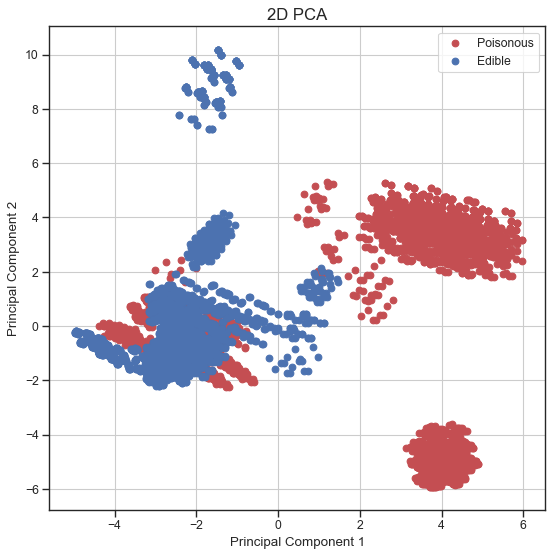

In [16]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'], PCA_df.loc[PCA_df['class'] == clas, 'PC2'], c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

In [17]:
pca.explained_variance_ratio_

array([0.08891017, 0.08125474])

In [18]:
complete_test_2D(X_pca, Y, 'PCA')

4.446491999999999
[[1242   32]
 [  92 1072]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1274
           1       0.97      0.92      0.95      1164

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [19]:
var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_ratio,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_ratio,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance Ratio by each principal components',
    yaxis=dict(
        title='Explained variance ratio in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
iplot(fig)

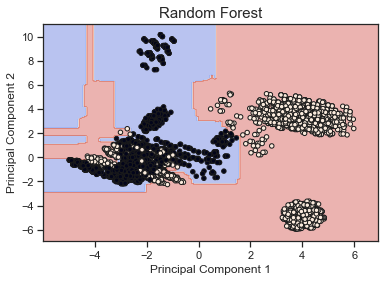

In [20]:
from itertools import product

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = trainedforest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('Random Forest', fontsize = 15)
plt.show()

In [21]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
complete_test_3D(X_pca, Y, 'PCA')

3.9904559999999982
[[1262   12]
 [  43 1121]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1274
           1       0.99      0.96      0.98      1164

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [22]:
var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_ratio,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_ratio,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance Ratio by each principal components',
    yaxis=dict(
        title='Explained variance ratio in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
iplot(fig)

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is non-linear dimensionality reduction technique which is typically used to visualize high dimensional datasets. Some of the main applications of t-SNE are Natural Language Processing (NLP), speech processing, etc… 


t-SNE works by minimizing the divergence between a distribution constituted by the pairwise probability similarities of the input features in the original high dimensional space and its equivalent in the reduced low dimensional space. t-SNE makes then use of the Kullback-Leiber (KL) divergence in order to measure the dissimilarity of the two different distributions. The KL divergence is then minimized using gradient descent. 

When using t-SNE, the higher dimensional space is modelled using a Gaussian Distribution, while the lower-dimensional space is modelled using a Student's t-distribution. This is done, in order to avoid an imbalance in the neighbouring points distance distribution caused by the translation into a lower-dimensional space.

In [23]:
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.107s...
[t-SNE] Computed neighbors for 8124 samples in 8.413s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 2.658530
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.845993
[t-SNE] KL divergence after 300 iterations: 2.141671
t-SNE done! Time elapsed: 22.922260999679565 seconds


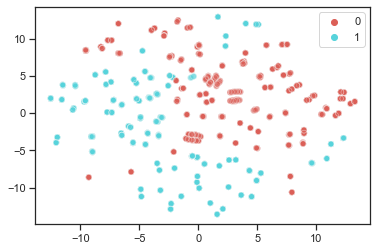

In [24]:
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=Y,
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)

In [25]:
complete_test_2D(X_tsne, Y, 't-SNE')

3.3402480000000025
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [26]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)
complete_test_3D(X_tsne, Y, 't-SNE')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.148s...
[t-SNE] Computed neighbors for 8124 samples in 8.118s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 2.658530
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.653389
[t-SNE] KL divergence after 300 iterations: 1.911506
4.020328000000006
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

    

### Linear Discriminant Analysis (LDA)

LDA is supervised learning dimensionality reduction technique and Machine Learning classifier. 

LDA aims to maximize the distance between the mean of each class and minimize the spreading within the class itself. LDA uses therefore within classes and between classes as measures. This is a good choice because maximizing the distance between the means of each class when projecting the data in a lower-dimensional space can lead to better classification results (thanks to the reduced overlap between the different classes). 

When using LDA, is assumed that the input data follows a Gaussian Distribution (like in this case), therefore applying LDA to not Gaussian data can possibly lead to poor classification results.

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 117
Reduced number of features: 1


/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.



In [28]:
lda.explained_variance_ratio_

array([1.])

In [29]:
forest_test(X_lda, Y)

1.9542260000000056
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [30]:
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_lda, Y, test_size = 0.30, random_state = 101)

start = time.process_time()
lda = LinearDiscriminantAnalysis().fit(X_Reduced,Y_Reduced)
print(time.process_time() - start)
predictionlda = lda.predict(X_Test_Reduced)
print(confusion_matrix(Y_Test_Reduced,predictionlda))
print(classification_report(Y_Test_Reduced,predictionlda))

0.0054839999999956035
[[1274    0]
 [   2 1162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



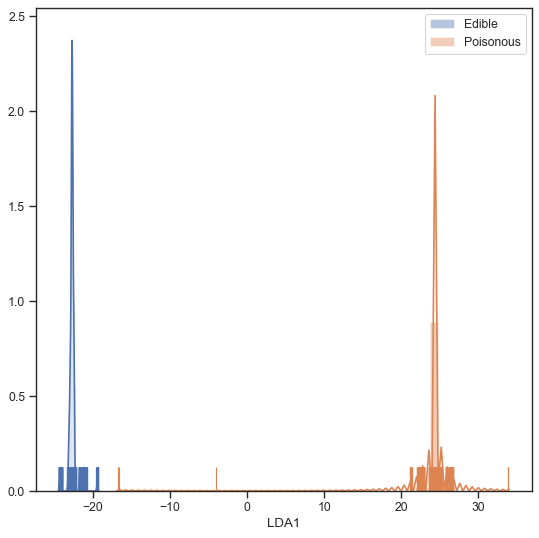

In [31]:
LDA_df = pd.DataFrame(data = X_lda, columns = ['LDA1'])
LDA_df = pd.concat([LDA_df, df['class']], axis = 1)
LDA_df['class'] = LabelEncoder().fit_transform(LDA_df['class'])

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(LDA_df.loc[LDA_df['class'] == 0]['LDA1'], label = 'Edible', hist=True, kde=True, rug=True)
sns.distplot(LDA_df.loc[LDA_df['class'] == 1]['LDA1'], label = 'Poisonous', hist=True, kde=True, rug=True)
plt.legend(loc='upper right')

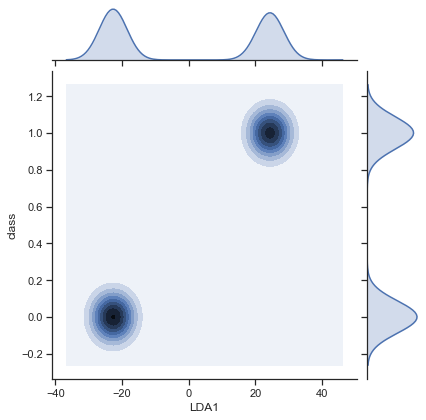

In [32]:
sns.jointplot(x="LDA1", y="class", data=LDA_df, kind="kde")

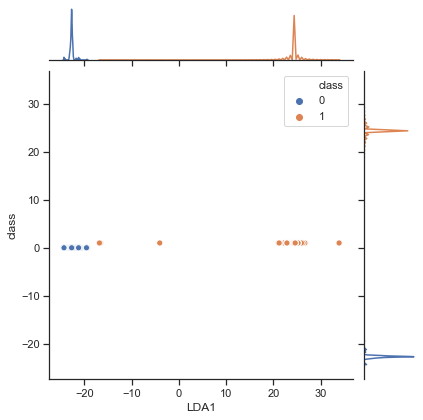

In [33]:
grid = sns.JointGrid(x='LDA1', y='class', data=LDA_df)

g = grid.plot_joint(sns.scatterplot, hue='class', data=LDA_df)
sns.kdeplot(LDA_df.loc[LDA_df['class']== 0, 'LDA1'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(LDA_df.loc[LDA_df['class']== 1, 'LDA1'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(LDA_df.loc[LDA_df['class']== 0, 'LDA1'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(LDA_df.loc[LDA_df['class']== 1, 'LDA1'], ax=g.ax_marg_y, vertical=True, legend=False)

### Indipendent Component Analysis (ICA)

ICA is a linear dimensionality reduction method which takes as input data a mixture of independent components and it aims to correctly identify each of them (deleting all the unnecessary noise). Two input features can be considered independent if both their linear and not linear dependance is equal to zero.

Independent Component Analysis is commonly used particularly in medical applications such as EEG and fMRI analysis to separate useful signals from unhelpful ones.

As a simple example of an ICA application, let's consider we are given an audio registration in which there are two different people talking. Using ICA we could, for example, try to identify the two different independent components in the registration (the two different people). In this way, we could make our unsupervised learning algorithm recognise between the different speakers in the conversation.

In [34]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_ica.shape[1])

Original number of features: 117
Reduced number of features: 2


In [35]:
complete_test_2D(X_ica, Y, 'ICA')

5.16667799999999
[[1236   38]
 [  94 1070]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1274
           1       0.97      0.92      0.94      1164

    accuracy                           0.95      2438
   macro avg       0.95      0.94      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [36]:
ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)

complete_test_3D(X_ica, Y, 'ICA')

4.0900939999999935
[[1264   10]
 [  39 1125]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1274
           1       0.99      0.97      0.98      1164

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



### Locally Linear Embedding (LLE)

We have considered so far methods such as PCA and LDA, which are able to perform really well in case of linear relationships between the different features, we will now move on considering how to deal with non-linear cases.
Locally Linear Embedding is a dimensionality reduction technique based on Manifold Learning. A Manifold is an object of D dimensions which is embedded in an higher-dimensional space. Manifold Learning aims then to make this object representable in its original D dimensions instead of being represented in an unnecessary greater space.

A typical example used to explain Manifold Learning in Machine Learning is the Swiss Roll Manifold. We are given as input some data which has a distribution resembling the one of a roll (in a 3D space), and we can then unroll it so that to reduce our data into a two-dimensional space.

Some examples of Manifold Learning algorithms are: Isomap, Locally Linear Embedding, Modified Locally Linear Embedding, Hessian Eigenmapping, etc…

According to the Scikit-learn documentation:
> Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.

In [37]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=2)
X_lle = embedding.fit_transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lle.shape[1])

ValueError: Error in determining null-space with ARPACK. Error message: 'Factor is exactly singular'. Note that method='arpack' can fail when the weight matrix is singular or otherwise ill-behaved.  method='dense' is recommended. See online documentation for more information.

In [ ]:
complete_test_2D(X_lle, Y, 'LLE')

In [ ]:
embedding = LocallyLinearEmbedding(n_components=3)
X_lle = embedding.fit_transform(X)
complete_test_3D(X_lle, Y, 'LLE')

### Autoencoders

Autoencoders are a family of Machine Learning algorithms which can be used as a dimensionality reduction technique. The main difference between Autoencoders and other dimensionality reduction techniques is that Autoencoders use non-linear transformations to project data from a high dimension to a lower one. 
There exist different types of Autoencoders such as: 
- Denoising Autoencoder 
- Variational Autoencoder
- Convolutional Autoencoder
- Sparse Autoencoder

In this example, we will start by building a basic Autoencoder. The basic architecture of an Autoencoder can be broken down into 2 main components:
- Encoder: takes the input data and compress it, so that to remove all the possible noise and unhelpful information. The output of the Encoder stage is usually called bottleneck or latent-space. 
- Decoder: takes as input the encoded latent space and tries to reproduce the original Autoencoder input using just it's compressed form (the encoded latent space).

If all the input features are independent of each other, then the Autoencoder will find particularly difficult to encode and decode to input data into a lower-dimensional space.

For this example, I decided to use ReLu as the activation function for the encoding stage and Softmax for the decoding stage. If I wouldn't have used non-linear activation functions, then the Autoencoder would have tried to reduce the input data using a linear transformation (therefore giving us a result similar to if we would have used PCA).

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(X.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='softmax')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                batch_size=300,
                shuffle=True,
                verbose = 0,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = encoder.predict(X)

In [ ]:
complete_test_2D(X_ae, Y, 'AE')

In [ ]:
input_layer = Input(shape=(X.shape[1],))
encoded = Dense(3, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='softmax')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                batch_size=300,
                shuffle=True,
                verbose = 0,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = encoder.predict(X)

In [ ]:
complete_test_3D(X_ae, Y, 'AE')